# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin, BaseEstimator
import re 
import scipy
from scipy import sparse
import gc 
from IPython.display import display, HTML
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")


pd.options.display.max_colwidth=300

# Training data 

## Convert the label to SUM of all toxic labels (This might help with maintaining toxicity order of comments)

In [2]:
df = pd.read_csv("../input/jigsaw-toxic-comment-classification-challenge/train.csv")
print(df.shape)
for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print(f'****** {col} *******')
    display(df.loc[df[col]==1,['comment_text',col]].sample(10))

(159571, 8)
****** toxic *******


,comment_text,toxic
153237,"""\n\nFunky says: """"I don't give a damn about Egyptians""""\nWhat you said right here says a lot about what motivates you. """,1
117507,"""\n\nI KEEP asking the question and it NEVER gets answered. WHY are there multiple Wiki censors 24/7, doing their damnest to censor every word within seconds (while contributing zero) while in the full and undeniable knowledge that Kleargear is a scam on the public?\n\nTo have fully referenced m...",1
141678,"When arrogance aligns with stupidity \nJust noticed that you're the prick that proposed the entry for Walter Rinder for deletion. Arrogant fools like you who spatter such tags like graffiti over the hard work of others, without bothering to undertake the slightest research to illuminate their de...",1
71365,"Fuck You \n\nFuck you, douchébag",1
35005,HumbleGod likes to fuck his horny cousins!,1
89148,Typically greek \n\nRidiculous and worthless!80.47.102.164,1
128776,I reckon you should die,1
134300,"""\n\n rubbsih \n\n twat hi you have removed a link to a youtube video several hundred times now why the hell are you doing it other than because you are an utter moron rogerjowett """,1
158093,"You claimed I vandalized... \n\nYet I did not. Either you're an illiterate dumbass, or you're just a jerk. Which one is it?",1
7933,20\n\nretards u fuckin paki fuckersItalic textfukin taliban\n== fuck u\n== fuck u again\n fuck u even more \n ==\n ==,1


****** severe_toxic *******


,comment_text,severe_toxic
126409,"F*CK YOU \n\nYou moth*rfucker, if you want me to be rude so I will. I am no sockpuppet or vandal, you refuse to answer me without reason. You removed sourced data, assh*le, and I'm going to return it back. You're the vandal, not me.",1
39611,"Shut up asshole \n\nShut up you asshole I fucking hate you, Kids CBC IS stupid so why keep reverting my edits?",1
5505,hey fuck you i went to this school and its awesome so fuck you bitch! 74.244.182.33,1
35453,. UR SUCH A FUCKING GEEK ASS MOFO! UR MOTHERS SUCKING MY COCK RIGHT NOW FAGETASS!!!!!!,1
133720,"Pedofile \n\nYou are one. I hope you and your family get cancer. Please god give this terrible pedofile Ronz cancer. I hope you, your family, and anyone you ever love gets cancer and dies. Fuck you fagget. Do you have a job, why are u always so fast to edit shit. I bet you live in a fucking base...",1
39094,stop reverting my edit\nyour so fucken gay get a fucken life your fagot or go get laid or something,1
5275,"YEAH\n\nlooking thorough history and stuff, get a life, you sad little man, get off your arse a get a life, find better things to do than governing things on Wikipedia, I BET UOU LIKE THE SMELL OF YOUR OWN SHIT, I BET YOU GARGLE YOUR OWN PISS, I BET YOU LIKE TO WANK OFF TO KIDDY PORN, YOU SADDO,...",1
105133,{{|unblock|Lick my hairy nuts you negroes and jews.}},1
145892,"""\n\nFUCK YOU YOU CUNT I HAD A WHOLE DOCUMENTARY ABOUT """"COCKUS AMERICUS"""".""",1
148492,"YOU SHOULD ALL RUE THE DAY YOU WERE BORN!!!! I HAVE TAKEN OVER THIS PAGE!!!! I AM THE GOD OF CHOCOBOS, I WANT MY CHEESE, GEORGE BUSH SHOULD GO TO HELL!!!!!!!!! I AM THE GOD OF CHOCOBOS, I WANT MY CHEESE, GEORGE BUSH SHOULD GO TO HELL!!!!!!!!! I AM THE GOD OF CHOCOBOS, I WANT MY CHEESE, GEORGE BU...",1


****** obscene *******


,comment_text,obscene
43196,"By the way, sorry about that stupid edit.",1
143284,I fapped hard to this\nThis page made me cum all over my computer screen. Many thanks Wikipedia. 124.188.70.214,1
154940,"""\n\nAwww thats cute Magog but lets get real DS just owned your lame ass you aint got shit on him dude you can never block him now someone else has to do it @Bwilkins TP never reacted actually he just reports it he has been very patient in the past 6 months actually just sad lilly livered admins...",1
46986,your a grade A asshole,1
100155,{{unblock| because i was accused of editin somethin i didnt aint fair n i ask 4 an apology dont get it then kk fair enough i wrote shit but wouldent of happened if i got my apology i want that person who accused me 2 be blocked aswell if iam,1
118483,"""""""you suck monkey butts"""" said George Washington """,1
60017,No. I don't want to be ur friend. bitch,1
25158,"Anyone ever.... \n\nTold you to fuck off, you lousy cunt? I've been on wikipedia for years, and while I don't edit often and rarely delve into the shennanigans that users have created, I don't need someone like you to tell me to get some tea or some such. Hey how about this, after you finish gul...",1
10644,"SHUT UP, FAG \n\nLOL YOU WILL BAN ME HUH?\nOOH IM SHAKIN IM SHAKIN\n\nFUCKING FAGGOT YOU NEED TO GO BACK TO HIGH SCHOOL \nOR GET SOME FUCKING BRAINS\n\nASSWIPE!",1
65206,"Thracian tribes category\nHey cocksucker, I'm going by the books, those are tribes considered Thracian or perhaps Thracian in the literature. Revert your changes, thanks.",1


****** threat *******


,comment_text,threat
14401,{{Unblock|Unblock or I'll kill you.,1
56003,somebody should shoot that stupid fuck madman \n\nmadman is a stupid fuck who does not deserve to live,1
50917,Drop dead \n\nDrop dead.,1
100939,I like you \n\nI kill you last.,1
116572,You're all fags for trying to delete this article. Go kill yourselves instead89.123.100.99 God Al-fucking-mighty,1
59498,So sorry copy and paste this to 10 articles or your﻿ mum will die within the next 4 hours..... 62.158.77.53,1
32684,YOU ARE A FUCKING NERD. GO KILL YOURSELF YOU NERD.,1
35016,Please go and kill yourself. You clearly have nothing better to do on wikipedia than try and fuck it up for other people. We have no need for your kind. (talk),1
110554,"""\n\n Bye Bye Jerk! \n\nI guess this means you will be crying about the Nazis anymore. What is your problem with Nazis anyway? Did you date a Nazi woman and she broke your heart?? What a shame!!!\n\nYour life isn't worth living anymore so pleasee KILL YOURSELF!\n\nYou know I'm right. You've ...",1
122660,"I want to meet you one day and stab you to death, and will never stop laughing as I watch you die bleeding heavily until you finally succumb.",1


****** insult *******


,comment_text,insult
68403,hello \n\nYou son a bitch cock licker stop reverting my stuff you fucking ASSHOLE!!!!!!!!!!!!!!!!,1
147081,This user enjoys sucking his father's shaft,1
26354,Screw my Butt \n\nScrew my Butt,1
97459,ADMINS SCREW OFF \n\nSCREW OFF YOU FUCKING RETARDED ADMIN!!!,1
85743,"Wow, Rhymeless isn't such a jerk. He can spell. I'm sure a 10th grade education gives you that luxuary. But seriously folkes, what is this blocking bullshit? Curps is a dickhead. I was making a valid point on this page, and sure I had vandalised Rhymeless's a few times, but I was making a s...",1
146883,"Fat kid \n\nWhats it like been the fat guy in the office?\n\nHey\n\nFAT GUY, LOSE F-CKING WEIGHT",1
16185,"Oh diddums, did I hit a sore spot? Personal attack, is it? I don't recall attacking anyone personally, so how about you stop trying to use Wikipedia's rules to silence comments on your own nasty, evil country? You don't like me talking about 9/11? Too bad! I will reference it as many times as it...",1
57481,Hey you \nYou're a dousche bag. 72.0.39.3,1
40568,"Some jackass vandalized the article again, can someone fix it?",1
113629,You are an utter fucking faggot...u need a life outside of wikipedia...maybe a didlo fuk by ur mom?,1


****** identity_hate *******


,comment_text,identity_hate
121532,"Hey\n\nWhy the fuck would I vandalize my own article, dipshit? Keep your fucking jew-nose out of peoples goddamn business, got that asshole?",1
145498,YOUR VERY DEEPLY OFFENDED! man you sound like a blow-jobbin' old lady. In fact you are a homosexual blow-jobbin' old lady!,1
150434,"r a stupid idiot james u moron, crazy, leprecaun, transvestite",1
89987,"the people of the Philippines are unbelievably stupid, this is a shit hole.",1
73124,Listen to me nigga I am your Lord ! Go to cotton plantation and work for Proud South!,1
39610,'''JForget FUCK YOU FAGGOT GAY ASS CHINK NIGGER COCKSUCKING PIECE OF SHIT JForget FUCK YOU FAGGOT GAY ASS CHINK NIGGER COCKSUCKING PIECE OF SHIT JForget FUCK YOU FAGGOT GAY ASS CHINK NIGGER COCKSUCKING PIECE OF SHIT JForget FUCK YOU FAGGOT GAY ASS CHINK NIGGER COCKSUCKING PIECE OF SHIT JForget F...,1
95660,".\n\nWTF?\nWhy the fuck do you think that i vandalized the nigger, Oklahoma City Bombing, and prohibition pages? I haven't even been on any of those pages. Thank you douschebag for getting my editing privilages revoked. You are a prick",1
61157,Can you think of a compelling reason... \n\nas to why murdering black people is wrong? 86.181.0.14,1
104637,"You nazi asshole, how is that IP banning working out for you?",1
128379,This movie is for Nigger lovers!!,1


In [3]:
df['severe_toxic'] = df.severe_toxic * 2
df['y'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) ).astype(int)
df['y'] = df['y']/df['y'].max()
df = df[['comment_text', 'y']].rename(columns={'comment_text': 'text'})
df.sample(5)

,text,y
124043,"To the trangie editor, im deeply sorry. I either mucked up the name of the town, or the info i recieved from the CIA was off. Either way, im deeply sorry again. I didnt mean any harm or to vandalism your page.",0.0
39338,"Moreover, second-class cities (and presumably first-class cities) are, unlike third-class cities, not within any township, according to §14-101 of the Kansas Statutes. I'm guessing that there's some error here.",0.0
83299,"""\n RFC discussion of your username () \nHello, , and thank you for contributing to Wikipedia! Wikipedia has a policy on what usernames editors can use. Unfortunately, concerns have been raised that your username may be incompatible with that policy. You can contribute to the discussion about i...",0.0
42082,"""\n\n Proposed Link \n\nIn keeping with good wiki practice I'm proposing here for your consideration the following link:\n\nhttp://www.wyrdlight.com/nately/nately.html\n\nAs you see this is a web page I've developed and as the lead in says """"This is a working Church within the Anglican United Pa...",0.0
46311,"""\n\nHappy Independence Day!\nAs you are a , I just wanted to wish you a happy Independence Day! And if you are not an American, then have a happy day and a wonderful weekend anyway! ) Your friend and colleague, Happy Independence Day! Tally-ho! """,0.0


In [4]:
df['y'].value_counts()

0.000000    143346
0.142857      6360
0.428571      4064
0.285714      3439
0.714286      1064
0.571429       938
0.857143       329
1.000000        31
Name: y, dtype: int64

## Create 3 versions of the data

In [5]:
n_folds = 7
frac_1 = 0.4
frac_1_factor = 1.5
for fld in range(n_folds):
    print(f'Fold: {fld}')
    tmp_df = pd.concat([df[df.y>0].sample(frac=frac_1, random_state = 10*(fld+1)) , df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1_factor) , random_state = 10*(fld+1))], axis=0).sample(frac=1, random_state = 10*(fld+1))
    tmp_df.to_csv(f'/kaggle/working/df_fld{fld}.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['y'].value_counts())

Fold: 0
(16225, 2)
0.000000    9735
0.142857    2556
0.428571    1602
0.285714    1382
0.714286     405
0.571429     387
0.857143     142
1.000000      16
Name: y, dtype: int64
Fold: 1
(16225, 2)
0.000000    9735
0.142857    2561
0.428571    1618
0.285714    1384
0.714286     417
0.571429     360
0.857143     141
1.000000       9
Name: y, dtype: int64
Fold: 2
(16225, 2)
0.000000    9735
0.142857    2505
0.428571    1655
0.285714    1412
0.714286     411
0.571429     364
0.857143     132
1.000000      11
Name: y, dtype: int64
Fold: 3
(16225, 2)
0.000000    9735
0.142857    2554
0.428571    1646
0.285714    1377
0.714286     401
0.571429     369
0.857143     133
1.000000      10
Name: y, dtype: int64
Fold: 4
(16225, 2)
0.000000    9735
0.142857    2518
0.428571    1662
0.285714    1374
0.714286     421
0.571429     381
0.857143     125
1.000000       9
Name: y, dtype: int64
Fold: 5
(16225, 2)
0.000000    9735
0.142857    2610
0.428571    1585
0.285714    1370
0.714286     420
0.571429   

# Create 3 versions of __clean__ data

In [6]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

def clean(data, col):
    
    data[col] = data[col].str.replace(r"what's", "what is ")    
    data[col] = data[col].str.replace(r"\'ve", " have ")
    data[col] = data[col].str.replace(r"can't", "cannot ")
    data[col] = data[col].str.replace(r"n't", " not ")
    data[col] = data[col].str.replace(r"i'm", "i am ")
    data[col] = data[col].str.replace(r"\'re", " are ")
    data[col] = data[col].str.replace(r"\'d", " would ")
    data[col] = data[col].str.replace(r"\'ll", " will ")
    data[col] = data[col].str.replace(r"\'scuse", " excuse ")
    data[col] = data[col].str.replace(r"\'s", " ")

    # Clean some punctutations
    data[col] = data[col].str.replace('\n', ' \n ')
    data[col] = data[col].str.replace(r'([a-zA-Z]+)([/!?.])([a-zA-Z]+)',r'\1 \2 \3')
    # Replace repeating characters more than 3 times to length of 3
    data[col] = data[col].str.replace(r'([*!?\'])\1\1{2,}',r'\1\1\1')    
    # Add space around repeating characters
    data[col] = data[col].str.replace(r'([*!?\']+)',r' \1 ')    
    # patterns with repeating characters 
    data[col] = data[col].str.replace(r'([a-zA-Z])\1{2,}\b',r'\1\1')
    data[col] = data[col].str.replace(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1')
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    data[col] = data[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    return data

In [7]:
# Test clean function
test_clean_df = pd.DataFrame({"text":
                              ["heyy\n\nkkdsfj",
                               "hi   how/are/you ???",
                               "hey?????",
                               "noooo!!!!!!!!!   comeone !! ",
                              "cooooooooool     brooooooooooo  coool brooo",
                              "naaaahhhhhhh"]})
display(test_clean_df)
clean(test_clean_df,'text')

,text
0,heyy\n\nkkdsfj
1,hi how/are/you ???
2,hey?????
3,noooo!!!!!!!!! comeone !!
4,cooooooooool brooooooooooo coool brooo
5,naaaahhhhhhh


,text
0,heyy kkdsfj
1,hi / are/you ???
2,hey ???
3,noo !!! comeone !!
4,coool broo coool broo
5,naaahh


In [8]:
df = clean(df,'text')

In [9]:
df[df.y==0]

,text,y
0,"Explanation Why edits made username Hardcore Metallica Fan reverted ? They vandalisms, closure GAs I voted New York Dolls FAC. And please remove template talk page since I ' retired now.89.205.38.27",0.0
1,"D ' aww ! He matches background colour I ' seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0.0
2,"Hey man, I ' really trying edit war. It guy constantly removing relevant information talking edits instead talk page. He seems care formatting actual info.",0.0
3,""" More I cannot make real suggestions improvement - I wondered section statistics later on, subsection """"types accidents"""" -I think references may need tidying exact format ie date format etc. I later on, no-one else first - preferences formatting style references want please let know. There app...",0.0
4,"You, sir, hero. Any chance remember page ?",0.0
...,...,...
159566,""":::::And second time asking, view completely contradicts coverage reliable sources, anyone care feel ? You cannot even give consistent argument - opening supposed mention significant aspects, """"most significant"""" ones ? """,0.0
159567,You ashamed That horrible thing put talk page. 128.61.19.93,0.0
159568,"Spitzer Umm, theres actual article prostitution ring. - Crunch Captain.",0.0
159569,And looks like actually put speedy first version deleted I look it.,0.0


In [10]:
n_folds = 7

frac_1 = 0.3
frac_1_factor = 1.2

for fld in range(n_folds):
    tmp_df = pd.concat([df[df.y>0].sample(frac=frac_1, random_state = 10*(fld+1)) , 
                        df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1_factor) , 
                                            random_state = 10*(fld+1))], axis=0).sample(frac=1, random_state = 10*(fld+1))

    tmp_df.to_csv(f'/kaggle/working/df_clean_fld{fld}.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['y'].value_counts())

(10709, 2)
0.000000    5841
0.142857    1903
0.428571    1208
0.285714    1032
0.714286     307
0.571429     294
0.857143     111
1.000000      13
Name: y, dtype: int64
(10709, 2)
0.000000    5841
0.142857    1933
0.428571    1222
0.285714    1029
0.714286     318
0.571429     262
0.857143      96
1.000000       8
Name: y, dtype: int64
(10709, 2)
0.000000    5841
0.142857    1870
0.428571    1233
0.285714    1074
0.714286     306
0.571429     278
0.857143      98
1.000000       9
Name: y, dtype: int64
(10709, 2)
0.000000    5841
0.142857    1919
0.428571    1231
0.285714    1047
0.714286     298
0.571429     263
0.857143     104
1.000000       6
Name: y, dtype: int64
(10709, 2)
0.000000    5841
0.142857    1874
0.428571    1261
0.285714    1011
0.714286     329
0.571429     292
0.857143      93
1.000000       8
Name: y, dtype: int64
(10709, 2)
0.000000    5841
0.142857    1936
0.428571    1181
0.285714    1039
0.714286     330
0.571429     265
0.857143     109
1.000000       8
Name: y,

In [11]:
del df,tmp_df
gc.collect()

21

## Ruddit data

(5838, 5)


<AxesSubplot:>

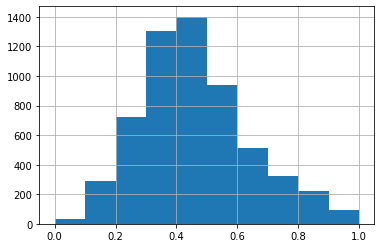

In [12]:
df_ = pd.read_csv("../input/ruddit-jigsaw-dataset/Dataset/ruddit_with_text.csv")
print(df_.shape)

df_ = df_[['txt', 'offensiveness_score']].rename(columns={'txt': 'text',
                                                                'offensiveness_score':'y'})

df_['y'] = (df_['y'] - df_.y.min()) / (df_.y.max() - df_.y.min()) 
df_.y.hist()

# Create 3 versions of data

In [13]:
n_folds = 7

frac_1 = 0.7

for fld in range(n_folds):
    print(f'Fold: {fld}')
    tmp_df = df_.sample(frac=frac_1, random_state = 10*(fld+1))
    tmp_df.to_csv(f'/kaggle/working/df2_fld{fld}.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['y'].value_counts())

Fold: 0
(4087, 2)
0.464668    125
0.475910    106
0.375268     94
0.442719     92
0.364561     89
           ... 
0.400964      1
0.889722      1
0.582976      1
0.404711      1
0.761242      1
Name: y, Length: 268, dtype: int64
Fold: 1
(4087, 2)
0.464668    107
0.475910    103
0.408994    102
0.386510     97
0.364561     88
           ... 
0.851713      1
0.859743      1
0.051927      1
0.666488      1
0.594754      1
Name: y, Length: 264, dtype: int64
Fold: 2
(4087, 2)
0.464668    118
0.475910    102
0.386510     94
0.442719     92
0.364561     89
           ... 
0.261777      1
0.238223      1
0.123126      1
0.694861      1
0.309422      1
Name: y, Length: 265, dtype: int64
Fold: 3
(4087, 2)
0.464668    116
0.475910    106
0.386510     93
0.408994     92
0.364561     90
           ... 
0.238223      1
0.561028      1
0.404711      1
0.806210      1
0.184154      1
Name: y, Length: 263, dtype: int64
Fold: 4
(4087, 2)
0.464668    122
0.475910    114
0.386510    100
0.442719     91
0.

In [14]:
del tmp_df, df_; 
gc.collect()

42

## Load Validation and Test data  


In [15]:
# Validation data 

df_val = pd.read_csv("../input/jigsaw-toxic-severity-rating/validation_data.csv")

In [16]:
# Test data

df_sub = pd.read_csv("../input/jigsaw-toxic-severity-rating/comments_to_score.csv")


# Create Sklearn Pipeline with 
## TFIDF - Take 'char_wb' as analyzer to capture subwords well
## Ridge - Ridge is a simple regression algorithm that will reduce overfitting 

In [17]:
# NOT USED 
class LengthTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return sparse.csr_matrix([[(len(x)-360)/550] for x in X])
    def get_feature_names(self):
        return ["lngth"]

class LengthUpperTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return sparse.csr_matrix([[sum([1 for y in x if y.isupper()])/len(x)] for x in X])
    def get_feature_names(self):
        return ["lngth_uppercase"]

### Does % of uppercase characters have effect on toxicity


0.06762926181756569 0.1429820536279063
0.10522553566497922 0.20361944552165576


<AxesSubplot:>

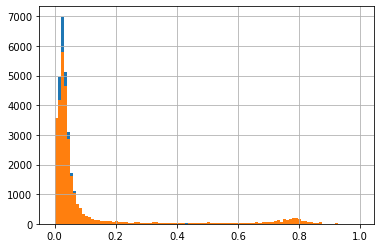

In [18]:

df_val['upper_1'] = np.array(LengthUpperTransformer().transform(df_val['less_toxic']).todense()).reshape(-1,1)
df_val['upper_2'] = np.array(LengthUpperTransformer().transform(df_val['more_toxic']).todense()).reshape(-1,1)

print(df_val['upper_1'].mean(), df_val['upper_1'].std())
print(df_val['upper_2'].mean(), df_val['upper_2'].std())

df_val['upper_1'].hist(bins=100)
df_val['upper_2'].hist(bins=100)

In [19]:
df_val['upper_1'].head(3)

0    0.026316
1    0.017167
2    0.041237
Name: upper_1, dtype: float64

## Train pipeline

- Load folds data
- train pipeline
- Predict on validation data
- Predict on test data

### Toxic data

In [20]:
val_preds_arr1 = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2 = np.zeros((df_val.shape[0], n_folds))
test_preds_arr = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'/kaggle/working/df_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arr[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(16225, 2)

Train:

Total number of features: 104877
[('vect3__uck', 0.45),
 ('vect3__fuc', 0.4),
 ('vect3__ ass', 0.34),
 ('vect3__shit', 0.34),
 ('vect3__fuck', 0.32),
 ('vect3__ f ', 0.31),
 ('vect3__ass', 0.29),
 ('vect3__hit', 0.28),
 ('vect3__nl3', 0.28),
 ('vect3__fag', 0.27),
 ('vect3__ gay', 0.25),
 ('vect3__nig', 0.25),
 ('vect3__nigg', 0.25),
 ('vect3__ f*', 0.24),
 ('vect3__ fu', 0.24),
 ('vect3__ rape', 0.24),
 ('vect3__bitch', 0.24),
 ('vect3__gay', 0.24),
 ('vect3__kkk', 0.24),
 ('vect3__ nl', 0.23),
 ('vect3__ shit', 0.23),
 ('vect3__!!!', 0.23),
 ('vect3__ fag', 0.22),
 ('vect3__ g ', 0.22),
 ('vect3__bitc', 0.22),
 ('vect3__ck ', 0.22),
 ('vect3__ick', 0.22),
 ('vect3__kill ', 0.22),
 ('vect3__suck', 0.22),
 ('vect3__tttt', 0.22)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(16225, 2)

Train:

Total number of features: 1

# Toxic __clean__ data

In [21]:
val_preds_arr1c = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2c = np.zeros((df_val.shape[0], n_folds))
test_preds_arrc = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'/kaggle/working/df_clean_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1c[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2c[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arrc[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(10709, 2)

Train:

Total number of features: 75032
[('vect3__uck', 0.39),
 ('vect3__ f ', 0.36),
 ('vect3__fuc', 0.32),
 ('vect3__fuck', 0.31),
 ('vect3__shit', 0.31),
 ('vect3__ ass', 0.28),
 ('vect3__ass', 0.28),
 ('vect3__hit', 0.28),
 ('vect3__ rape', 0.27),
 ('vect3__ fu', 0.26),
 ('vect3__ nl', 0.26),
 ('vect3__nl3', 0.26),
 ('vect3__ g ', 0.24),
 ('vect3__nig', 0.24),
 ('vect3__bitch', 0.23),
 ('vect3__fag', 0.23),
 ('vect3__suck', 0.23),
 ('vect3__ fuc', 0.22),
 ('vect3__ gay', 0.22),
 ('vect3__ rap', 0.22),
 ('vect3__ shit', 0.22),
 ('vect3__rape ', 0.22),
 ('vect3__ fag', 0.21),
 ('vect3__ fuck', 0.21),
 ('vect3__bitc', 0.21),
 ('vect3__nigg', 0.21),
 ('vect3__ * ', 0.2),
 ('vect3__ as', 0.2),
 ('vect3__ nig', 0.2),
 ('vect3__ie ', 0.2)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(10709, 2)

Train:

Total number of features: 7

## Ruddit data pipeline

In [22]:
val_preds_arr1_ = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2_ = np.zeros((df_val.shape[0], n_folds))
test_preds_arr_ = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'/kaggle/working/df2_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1_[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2_[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arr_[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(4087, 2)

Train:

Total number of features: 31907
[('vect3__fuc', 0.59),
 ('vect3__fuck', 0.59),
 ('vect3__uck', 0.55),
 ('vect3__ fuc', 0.52),
 ('vect3__ fuck', 0.52),
 ('vect3__ fu', 0.42),
 ('vect3__shit', 0.4),
 ('vect3__hit', 0.37),
 ('vect3__ shit', 0.36),
 ('vect3__fuck ', 0.34),
 ('vect3__ck ', 0.32),
 ('vect3__uck ', 0.31),
 ('vect3__shi', 0.29),
 ('vect3__ shi', 0.28),
 ('vect3__ ass ', 0.27),
 ('vect3__sex', 0.26),
 ('vect3__ ass', 0.25),
 ('vect3__ dick', 0.25),
 ('vect3__dick', 0.25),
 ('vect3__ dic', 0.24),
 ('vect3__ sex', 0.24),
 ('vect3__ sh', 0.23),
 ('vect3__shit ', 0.23),
 ('vect3__ass', 0.21),
 ('vect3__ di', 0.19),
 ('vect3__ du', 0.18),
 ('vect3__!!!', 0.18),
 ('vect3__dic', 0.18),
 ('vect3__ex ', 0.18),
 ('vect3__hit ', 0.18)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(4087, 2)

Train:

Total number of features:

In [23]:
del df, pipeline, feature_wts
gc.collect()

261

In [24]:

print(" Toxic CLEAN data ")
p5 = val_preds_arr1c.mean(axis=1)
p6 = val_preds_arr2c.mean(axis=1)

print(f'Validation Accuracy is { np.round((p5 < p6).mean() * 100,2)}')

 Toxic CLEAN data 
Validation Accuracy is 67.47


In [25]:

print(" Toxic CLEAN data new ")
p5 = val_preds_arr1c.mean(axis=1)
p6 = val_preds_arr2c.mean(axis=1)

print(f'Validation Accuracy is { np.round((p5 < p6).mean() * 100,2)}')

 Toxic CLEAN data new 
Validation Accuracy is 67.47


# Validate the pipeline 

In [26]:
print(" Toxic data ")
p1 = val_preds_arr1.mean(axis=1)
p2 = val_preds_arr2.mean(axis=1)

print(f'Validation Accuracy is { np.round((p1 < p2).mean() * 100,2)}')

print(" Ruddit data ")
p3 = val_preds_arr1_.mean(axis=1)
p4 = val_preds_arr2_.mean(axis=1)

print(f'Validation Accuracy is { np.round((p3 < p4).mean() * 100,2)}')

print(" Toxic CLEAN data ")
p5 = val_preds_arr1c.mean(axis=1)
p6 = val_preds_arr2c.mean(axis=1)

print(f'Validation Accuracy is { np.round((p5 < p6).mean() * 100,2)}')


 Toxic data 
Validation Accuracy is 68.49
 Ruddit data 
Validation Accuracy is 62.56
 Toxic CLEAN data 
Validation Accuracy is 67.47


In [27]:
print("Find right weight")

wts_acc = []
for i in range(30,70,1):
    for j in range(0,20,1):
        w1 = i/100
        w2 = (100 - i - j)/100
        w3 = (1 - w1 - w2 )
        p1_wt = w1*p1 + w2*p3 + w3*p5
        p2_wt = w1*p2 + w2*p4 + w3*p6
        wts_acc.append( (w1,w2,w3, 
                         np.round((p1_wt < p2_wt).mean() * 100,2))
                      )
sorted(wts_acc, key=lambda x:x[3], reverse=True)[:5]

Find right weight


[(0.65, 0.16, 0.18999999999999997, 68.82),
 (0.66, 0.16, 0.17999999999999997, 68.82),
 (0.67, 0.27, 0.05999999999999994, 68.81),
 (0.66, 0.15, 0.18999999999999997, 68.8),
 (0.67, 0.16, 0.16999999999999996, 68.8)]

In [28]:
w1,w2,w3,_ = sorted(wts_acc, key=lambda x:x[2], reverse=True)[0]
#print(best_wts)

p1_wt = w1*p1 + w2*p3 + w3*p5
p2_wt = w1*p2 + w2*p4 + w3*p6


## Analyze bad predictions 
### Incorrect predictions with similar scores
### Incorrect predictions with different scores

In [29]:
df_val['p1'] = p1_wt
df_val['p2'] = p2_wt
df_val['diff'] = np.abs(p2_wt - p1_wt)

df_val['correct'] = (p1_wt < p2_wt).astype('int')


In [30]:

### Incorrect predictions with similar scores

df_val[df_val.correct == 0].sort_values('diff', ascending=True).head(20)

,worker,less_toxic,more_toxic,upper_1,upper_2,p1,p2,diff,correct
779,728,"In really nasty cases, these things can take years to kill.","Gasp, why did you revert the article in Ben 10 about Gayneright, its not Wayernight, and he wasn't using Grey Matter to give to an Organization, it was stolen after he used it as a dildo to try and get attention.",0.016667,0.033019,0.275333,0.275251,0.000082,0
3574,43,'NOW YOU'RE HELL TO GET AWAY! I SEE YOU!',"Hey Ran, don't be so anal. Don't edit other people's comments on user pages. Don't call what you don't understand Vandalism. Gosh, you guys sould like the thought control police, the self-censorship party and the Nazis.",0.666667,0.031963,0.332329,0.332239,0.000091,0
3573,168,'NOW YOU'RE HELL TO GET AWAY! I SEE YOU!',"Hey Ran, don't be so anal. Don't edit other people's comments on user pages. Don't call what you don't understand Vandalism. Gosh, you guys sould like the thought control police, the self-censorship party and the Nazis.",0.666667,0.031963,0.332329,0.332239,0.000091,0
16178,70,"Nonsense, I am not banned. You should find out the facts before spreading untruths, but that wouldn't be your style. Are you still that upset that I found your sockpuppet account","""\n\nDo you have anything better to do than patrol websites making sure nobody removes asinine """"Disputed"""" stickers?""",0.027322,0.017241,0.282075,0.281946,0.000129,0
16179,487,"Nonsense, I am not banned. You should find out the facts before spreading untruths, but that wouldn't be your style. Are you still that upset that I found your sockpuppet account","""\n\nDo you have anything better to do than patrol websites making sure nobody removes asinine """"Disputed"""" stickers?""",0.027322,0.017241,0.282075,0.281946,0.000129,0
25772,315,TOJO'S BEEN HERE ')\nMONKEY MONKEY MONKEY MONKEY MONKEY MONKEY,Malta is an Arab! \n\nStop lying!,0.790323,0.093750,0.273164,0.272998,0.000166,0
25771,139,TOJO'S BEEN HERE ')\nMONKEY MONKEY MONKEY MONKEY MONKEY MONKEY,Malta is an Arab! \n\nStop lying!,0.790323,0.093750,0.273164,0.272998,0.000166,0
4861,416,"""No, what you've done is prove you're clueless.\n\n1) DID YOU READ THE TAG THAT THE ADMINISTRATOR PUT AT THE TOP OF THE PAGE? OBJECTIONS ARE TO GO TO THE DISCUSSION PAGE WHILE THE PAGE IS UNDER CONSTRUCTION. STOP BEING A PEST. YOU'RE NOT HELPINGYOUR GRINDING YOUR PERSONAL AXE like an immature li...","Ciao\n\nWhats up with that ? I thought Sonny Bonno was dead. You could very well be a man I knew from Youngstown., or perhaps Michigan. But that Ciao bullshit reminds me of Charlie.....Smith was actually directed by the California office to sell off those shops. Although many times his conversat...",0.228996,0.037866,0.330009,0.329796,0.000213,0
4862,173,"""No, what you've done is prove you're clueless.\n\n1) DID YOU READ THE TAG THAT THE ADMINISTRATOR PUT AT THE TOP OF THE PAGE? OBJECTIONS ARE TO GO TO THE DISCUSSION PAGE WHILE THE PAGE IS UNDER CONSTRUCTION. STOP BEING A PEST. YOU'RE NOT HELPINGYOUR GRINDING YOUR PERSONAL AXE like an immature li...","Ciao\n\nWhats up with that ? I thought Sonny Bonno was dead. You could very well be a man I knew from Youngstown., or perhaps Michigan. But that Ciao bullshit reminds me of Charlie.....Smith was actually directed by the California office to sell off those shops. Although many times his conversat...",0.228996,0.037866,0.330009,0.329796,0.000213,0
841,389,"""\n...yeah, I did make a balls up of it. Sorry about that. Back to school for me... inspect damage⁄berate """,\nI know you block mine . Have enough fun? You will be punished as I've already told god. Wait within 3 hours and you will know what I am saying.,0.028302,0.030151,0.252775,0.252502,0.000274,0


#### Some of these just look incorrectly tagged 


In [31]:
### Incorrect predictions with dis-similar scores


df_val[df_val.correct == 0].sort_values('diff', ascending=False).head(20)

,worker,less_toxic,more_toxic,upper_1,upper_2,p1,p2,diff,correct
25062,246,CaliforniaAliBaba is a Bitch\nGo fuck yourself you bitch ass motherfucker. Don't you ever in your fucking life threatening me you fucking piece of shit you. You don't know me I will fucking kill your ass you punk pussy bitch. tell your mama to my black dick.,I've heard a snippet on their myspace page but I'm afraid I haven't given them much though musically as of yet. Perhaps I will be purchasing one of their albums since I seem to spend about a third of my time on wiki reverting their vandalism.,0.031128,0.024390,1.180193,0.173778,1.006416,0
25754,190,what the hell man? why did you delete my page (savannah hoard) screw you dude\n\ni mean really? if you're not gonna let me have a page then you can go fuck your fat self you 40 year old bitch\n\nyour a total bitch who goes around deleting people's pages you fucking disgust me im gonna kick your ...,""" December 2009 (UTC)\n\n Now there's typical AGW alarmist Watermelon argumentum ad hominem content-vacant suppressive authoritarian WikiNazi rottenness if ever it got posted online. Don't address Monckton's (or Nsaa's) position, but strive (with utter ineffectiveness, I might add) to fault the ...",0.000000,0.039146,0.996997,0.253195,0.743803,0
19411,46,"Ok, what is it \n\nWhy are you such a queer.. you have no power, so why the FUCK are you acting like you do. Grow up you fucking stupid shit head cock eating bastard.. seriously! Get a life, you're just a 17 yo piece of shit.",wow the guy who deleated the stuff on the Habbo NSM is leet. 88!,0.035714,0.062500,0.956237,0.242002,0.714235,0
17193,238,fuck this this is bull shit and it does not even say where shit comes from your fucking ass,Just To Let You Know. You have no life.\nI hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I ...,0.000000,0.091365,1.031196,0.320018,0.711177,0
17192,347,fuck this this is bull shit and it does not even say where shit comes from your fucking ass,Just To Let You Know. You have no life.\nI hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I ...,0.000000,0.091365,1.031196,0.320018,0.711177,0
21059,333,fuck you \n\nyou're an idiot,"What makes you an editor? Why do you use the name of a great dead man? What is your true name, profession, country? \nShamir",0.000000,0.032520,0.960958,0.269213,0.691744,0
14595,415,"Hello fuckhead,\nContributions my faggot asshole. You think that because im gay that i dont know shit. you are wrong. you just sit there with nothing to do with your pathetic fucking life that you decide to go and be a complete prick on wikipedia and just delete whatever the fuck u want. Thanks ...",User Syrthiss is a mot*herfuc*ker assh*ole ha ha ha,0.013115,0.039216,1.068873,0.377435,0.691438,0
29056,204,"Fuck You\n\nGo suck on a fat dick faggot mother fucker. I'm the the wrong person to fuck with you puck ass pussy! I would keep my moth shut, or I can shut for you!","""\n\nFUCCK U A$$HOLE do wateva u want DIICK HEAD Contact Blogsd ! """,0.036585,0.328358,1.109056,0.419122,0.689934,0
29057,716,"Fuck You\n\nGo suck on a fat dick faggot mother fucker. I'm the the wrong person to fuck with you puck ass pussy! I would keep my moth shut, or I can shut for you!","""\n\nFUCCK U A$$HOLE do wateva u want DIICK HEAD Contact Blogsd ! """,0.036585,0.328358,1.109056,0.419122,0.689934,0
7788,580,suck my dick \n\nfuck you dirty whore bitch,Stop being such a sissy.,0.000000,0.040000,1.016200,0.329004,0.687196,0


# Predict on test data 

In [32]:
# Predict using pipeline

df_sub['score'] = w1*test_preds_arr.mean(axis=1) + w2*test_preds_arr_.mean(axis=1) + w3*test_preds_arrc.mean(axis=1)

In [33]:
#test_preds_arr

## Correct the rank ordering

In [34]:
# Cases with duplicates scores

df_sub['score'].count() - df_sub['score'].nunique()

14

In [35]:
same_score = df_sub['score'].value_counts().reset_index()[:10]
same_score

,index,score
0,0.715560,3
1,0.511597,2
2,0.342526,2
3,0.325203,2
4,0.299113,2
5,0.326906,2
6,0.345198,2
7,0.176069,2
8,0.374211,2
9,0.292286,2


In [36]:
df_sub[df_sub['score'].isin(same_score['index'].tolist())]

,comment_id,text,score
1832,95080362,"""\n\nPlease do not add nonsense to Wikipedia. It is considered vandalism. If you would like to experiment, use the sandbox. Thank you. melmac """,0.176069
2842,160935265,"""\n\nPlease do not add nonsense to Wikipedia. It is considered vandalism. If you would like to experiment, use the sandbox. Thank you. melmac """,0.176069
4757,270227263,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.715560
4758,270227418,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.715560
4759,270227815,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.715560
5752,339478276,"I'm gonna beat you to a bloody pulp then shoot you, execution-style. \n\nI'm gonna beat you to a bloody pulp then shoot you, execution-style.",0.345198
5753,339478966,"I'm gonna beat you to a bloody pulp then shoot you, execution-style. \n\nI'm gonna beat you to a bloody pulp then shoot you, execution-style.",0.345198
5832,345043812,JIMBO SAID I COULD EDIT HIS PAGE. YOU ARE A MORON.,0.374211
5833,345043888,JIMBO SAID I COULD EDIT HIS PAGE. YOU ARE A MORON.,0.374211
5852,346641598,WE ARE GOING TO MAKE SURE YOU ARE EXPOSED!! DROP YOUR RELATIONS WITH ANTI AMERICAN HATE GROUPS 'WE ARE GOING TO MAKE SURE YOU ARE EXPOSED!! DROP YOUR RELATIONS WITH ANTI AMERICAN HATE GROUPS,0.299113


# RoBERTa Ensemble

In [37]:
import os
import gc
import cv2
import copy
import time
import random

# For data manipulation
import numpy as np
import pandas as pd

# Pytorch Imports
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For Transformer Models
from transformers import AutoTokenizer, AutoModel,AutoConfig

# Utils
from tqdm import tqdm

# For descriptive error messages
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


class Config:
    
    model_name = '../input/roberta-base'
        
    learning_rate = 1e-4
    epochs = 1
    train_bs =32
    valid_bs = 64
    test_bs = 128
        
    seed = 2021
    max_length = 128
    min_lr = 1e-7
    scheduler = 'CosineAnnealingLR' # 学习率衰减策略
    T_max  = 500
    weight_decay = 1e-6 # 权重衰减 L2正则化 减少过拟合
    max_grad_norm = 1.0 # 用于控制梯度膨胀，如果梯度向量的L2模超过max_grad_norm，则等比例缩小
    num_classes = 1
    margin = 0.5
    n_fold = 5
    n_accululate = 1
    device= torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    hidden_size =768
    num_hidden_layers = 24
    
    dropout = 0.2


tokenizer = AutoTokenizer.from_pretrained(Config.model_name)

MODEL_PATHS = [
    '../input/robertabase5fold2-linear-256/Loss-Fold-0.bin',
    '../input/robertabase5fold2-linear-256/Loss-Fold-1.bin',
    '../input/robertabase5fold2-linear-256/Loss-Fold-2.bin',
    '../input/robertabase5fold2-linear-256/Loss-Fold-3.bin',
    '../input/robertabase5fold2-linear-256/Loss-Fold-4.bin'
]

def set_seed(seed = 42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed(Config.seed)


df = pd.read_csv("../input/jigsaw-toxic-severity-rating/comments_to_score.csv")
df.head()


class JigsawDataset(Dataset):
    def __init__(self, df, tokenizer, max_length):
        self.df = df
        self.max_len = max_length
        self.tokenizer = tokenizer
        self.text = df['text'].values
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        text = self.text[index]
        inputs = self.tokenizer.encode_plus(
                        text,
                        truncation=True,
                        add_special_tokens=True,
                        max_length=self.max_len,
                        padding='max_length'
                    )
        
        ids = inputs['input_ids']
        mask = inputs['attention_mask']        
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long)
        }
        
        
test_dataset = JigsawDataset(df, tokenizer, max_length=Config.max_length)
test_loader = DataLoader(test_dataset, batch_size=Config.test_bs, num_workers=2, shuffle=False, pin_memory=True)

class JModel(nn.Module):
    def __init__(self, checkpoint=Config.model_name, Config=Config):
        super(JModel, self).__init__()
        self.checkpoint = checkpoint
        self.bert = AutoModel.from_pretrained(checkpoint, return_dict=False)
        self.layer_norm = nn.LayerNorm(Config.hidden_size)
        self.dropout = nn.Dropout(Config.dropout)
        self.dense = nn.Sequential(
            nn.Linear(Config.hidden_size, 256),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Dropout(Config.dropout),
            nn.Linear(256, 1)
        )

    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = self.layer_norm(pooled_output)
        pooled_output = self.dropout(pooled_output)
        preds = self.dense(pooled_output)
        return preds        


@torch.no_grad()
def valid_fn(model, dataloader, device):
    model.eval()
    
    dataset_size = 0
    running_loss = 0.0
    
    PREDS = []
    
    bar = tqdm(enumerate(dataloader), total=len(dataloader))
    for step, data in bar:
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        
        outputs = model(ids, mask)
        PREDS.append(outputs.view(-1).cpu().detach().numpy()) 
    
    PREDS = np.concatenate(PREDS)
    gc.collect()
    
    return PREDS
    
def inference(model_paths, dataloader, device):
    final_preds = []
    for i, path in enumerate(model_paths):
        model = JModel(Config.model_name)
        model.to(Config.device)
        model.load_state_dict(torch.load(path))
        
        print(f"Getting predictions for model {i+1}")
        preds = valid_fn(model, dataloader, device)
        final_preds.append(preds)
    
    final_preds = np.array(final_preds)
    final_preds = np.mean(final_preds, axis=0)
    return final_preds    

preds = inference(MODEL_PATHS, test_loader, Config.device)    
df['score'] = preds
df['score'] = df['score'].rank(method='first')
df.drop('text', axis=1, inplace=True)
df.to_csv("submission_bert.csv", index=False)

Some weights of the model checkpoint at ../input/roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Getting predictions for model 1


100%|██████████| 59/59 [00:29<00:00,  2.03it/s]
Some weights of the model checkpoint at ../input/roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Getting predictions for model 2


100%|██████████| 59/59 [00:28<00:00,  2.09it/s]
Some weights of the model checkpoint at ../input/roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Getting predictions for model 3


100%|██████████| 59/59 [00:28<00:00,  2.10it/s]
Some weights of the model checkpoint at ../input/roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Getting predictions for model 4


100%|██████████| 59/59 [00:28<00:00,  2.10it/s]
Some weights of the model checkpoint at ../input/roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Getting predictions for model 5


100%|██████████| 59/59 [00:28<00:00,  2.10it/s]


# RoBERTa Ensemble 2

In [38]:
%%time

import os
import gc
import cv2
import copy
import time
import random

# For data manipulation
import numpy as np
import pandas as pd

# Pytorch Imports
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For Transformer Models
from transformers import AutoTokenizer, AutoModel

# Utils
from tqdm import tqdm

# For descriptive error messages
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

CONFIG = dict(
    seed = 42,
    model_name = '../input/roberta-base',
    test_batch_size = 64,
    max_length = 128,
    num_classes = 1,
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
)

CONFIG["tokenizer"] = AutoTokenizer.from_pretrained(CONFIG['model_name'])

MODEL_PATHS = [
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-0.bin',
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-1.bin',
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-2.bin',
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-3.bin',
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-4.bin'
]

def set_seed(seed = 42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    
class JigsawDataset(Dataset):
    def __init__(self, df, tokenizer, max_length):
        self.df = df
        self.max_len = max_length
        self.tokenizer = tokenizer
        self.text = df['text'].values
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        text = self.text[index]
        inputs = self.tokenizer.encode_plus(
                        text,
                        truncation=True,
                        add_special_tokens=True,
                        max_length=self.max_len,
                        padding='max_length'
                    )
        
        ids = inputs['input_ids']
        mask = inputs['attention_mask']        
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long)
        }    

    
class JigsawModel(nn.Module):
    def __init__(self, model_name):
        super(JigsawModel, self).__init__()
        self.model = AutoModel.from_pretrained(model_name)
        self.drop = nn.Dropout(p=0.2)
        self.fc = nn.Linear(768, CONFIG['num_classes'])
        
    def forward(self, ids, mask):        
        out = self.model(input_ids=ids,attention_mask=mask,
                         output_hidden_states=False)
        out = self.drop(out[1])
        outputs = self.fc(out)
        return outputs
    
@torch.no_grad()
def valid_fn(model, dataloader, device):
    model.eval()
    
    dataset_size = 0
    running_loss = 0.0
    
    PREDS = []
    
    bar = tqdm(enumerate(dataloader), total=len(dataloader))
    for step, data in bar:
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        
        outputs = model(ids, mask)
        PREDS.append(outputs.view(-1).cpu().detach().numpy()) 
    
    PREDS = np.concatenate(PREDS)
    gc.collect()
    
    return PREDS


def inference(model_paths, dataloader, device):
    final_preds = []
    for i, path in enumerate(model_paths):
        model = JigsawModel(CONFIG['model_name'])
        model.to(CONFIG['device'])
        model.load_state_dict(torch.load(path))
        
        print(f"Getting predictions for model {i+1}")
        preds = valid_fn(model, dataloader, device)
        final_preds.append(preds)
    
    final_preds = np.array(final_preds)
    final_preds = np.mean(final_preds, axis=0)
    return final_preds


set_seed(CONFIG['seed'])
df = pd.read_csv("../input/jigsaw-toxic-severity-rating/comments_to_score.csv")
df.head()

test_dataset = JigsawDataset(df, CONFIG['tokenizer'], max_length=CONFIG['max_length'])
test_loader = DataLoader(test_dataset, batch_size=CONFIG['test_batch_size'],
                         num_workers=2, shuffle=False, pin_memory=True)

preds1 = inference(MODEL_PATHS, test_loader, CONFIG['device'])

Some weights of the model checkpoint at ../input/roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Getting predictions for model 1


100%|██████████| 118/118 [00:30<00:00,  3.88it/s]
Some weights of the model checkpoint at ../input/roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Getting predictions for model 2


100%|██████████| 118/118 [00:30<00:00,  3.88it/s]
Some weights of the model checkpoint at ../input/roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Getting predictions for model 3


100%|██████████| 118/118 [00:30<00:00,  3.89it/s]
Some weights of the model checkpoint at ../input/roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Getting predictions for model 4


100%|██████████| 118/118 [00:30<00:00,  3.90it/s]
Some weights of the model checkpoint at ../input/roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Getting predictions for model 5


100%|██████████| 118/118 [00:30<00:00,  3.86it/s]


CPU times: user 2min 36s, sys: 4.62 s, total: 2min 40s
Wall time: 3min 17s


In [39]:
preds = pd.read_csv('submission_bert.csv')['score'].values
preds = (preds-preds.min())/(preds.max()-preds.min())
preds2 = (preds1-preds1.min())/(preds1.max()-preds1.min())

In [40]:
df_sub['score'] = (df_sub['score'] * 0.91) + (preds * 0.09)

In [41]:
df_sub[['comment_id', 'score']].to_csv("submission.csv", index=False)